# COMP5318 - Machine Learning and Data Mining 

## Tutorial 11 - Neural Networks & Deep Learning

**Semester 2, 2019**

**Objectives:**

* To learn about Perceptron
* To learn about dimensionality reduction 
* To learn about simple DNN 2 layers
* To learn about CNN
* To learn about Dropout, Pooling

**Instructions:**
* Exercises to be completed on IPython notebook such as: 
   * Ipython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based Ipython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "lab11.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "lab11.ipynb" file
* Complete exercises in "lab10.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.


Lecturers: Nguyen Hoang Tran

Tutors: Fengxiang He, Shaojun Zhang, Fangzhou Shi, Yang Lin, Iwan Budiman, Zhiyi Wang, Canh Dinh, Yixuan Zhang, Rui Dong, Haoyu He, Dai Hoang Tran, Peibo Duan

## 1. Perceptron

In [1]:
import numpy as np
import matplotlib.pylab as pl
import math
%matplotlib inline

Loading data

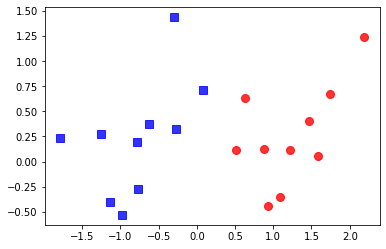

In [2]:
from __future__ import print_function 
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2)

means = [[-1, 0], [1, 0]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

X = np.concatenate((X0, X1), axis = 0)
y = np.concatenate((np.ones(N), -1*np.ones(N)))

#fig,axs=plt.subplots(nrows,ncols,figsize=(width,height))
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.show()

This data set has 2 classes in total. We will use perceptron algorithm to make a decision boundary for this dataset.

In perception, we minimizes the number of errors on the training dataset follows:

$$ \epsilon = \sum_n 1_{[y_n \neq sign(w^tx_n)]}$$

**Algorithm:**

For a randomly chosen data point $(x_n, y_n)$ make small changes to $w$ so that : $y_n = sign(w^tx_n)$:

2 case:
- If $y_n = sign(w^tx_n)$: Do nothing
- If $y_n \neq sign(w^tx_n)$: update w : $w_{t+1} = w_{t} + y_nx_n$ => we only update $w$ for misclassified point. The update process will be stopped when there is no misclassified point.

**Create Perception Algorithm from scratch:**

In [3]:
def predict(w, X):    
    '''
    predict label of each row of X, given w 
    '''
    return np.sign(X.dot(w))

def perceptron(X, y, w_init):
    w = w_init
    w_hist = [w]
    mis_points = [] # list of misclassified points
    while True:
        pred = predict(w, X)
        mis_idxs = np.where(np.equal(pred, y) == False)[0]
        num_mis = mis_idxs.shape[0]
        if num_mis == 0:
            return (w_hist, mis_points)
        # random pick one misclassified point 
        random_id = np.random.choice(mis_idxs, 1)[0]
        mis_points.append(random_id)
        w = w + y[random_id]*X[random_id]
        w_hist.append(w)

Make the prediction

In [4]:
np.random.seed(73)
Xbar = np.concatenate((np.ones((2*N, 1)), X), axis = 1)
d = Xbar.shape[1]
w_init = np.random.randn(d)
w_hist, m = perceptron(Xbar, y, w_init)

Visualize the change of boundary during the learning processs depends on number of update 

In [5]:
from matplotlib.backends.backend_pdf import PdfPages    
def draw_line(plt, w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')

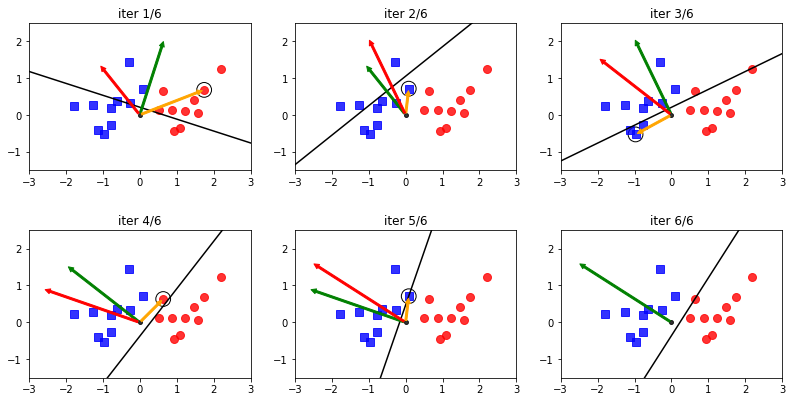

In [6]:
ncols = m 
if(len(m) >= 3):
    ncols = 3
nrows = math.ceil(len(m)/3)
width = 4.5*ncols 
height = 3.5*nrows

filename = 'pla_visualize1.pdf'
with PdfPages(filename) as pdf: 
    plt.close('all')
    fig,axs=plt.subplots(nrows,ncols,figsize=(width,height))
    ids = range(len(m)+1)
    for i, k in enumerate(ids[1:]):
        #print("i,k",i,k)
        r = i//ncols 
        c = i%ncols 
        str0 = 'iter {}/{}'.format(i+1, len(ids)-1)
        if(nrows > 1):
            temp = axs[r, c]
        else:
            temp = axs[c]
        if nrows > 1:
            temp.set_title(str0)
            temp.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
            temp.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
            temp.plot(0, 0, 'k.', markersize = 8, alpha = .8)
            temp.axis([0 , 6, -2, 4])
            draw_line(temp, w_hist[k])
            wx, wy = w_hist[k][1], w_hist[k][2]
            temp.annotate('', xy=(wx, wy), xytext=(0, 0),arrowprops=dict(arrowstyle="simple", connectionstyle="arc3", ec = 'green', fc = 'green'))
        if k < nrows*ncols:
            
            # get misclassified point
            xmis = X[m[k], 0] 
            ymis = X[m[k], 1]
            
            #circle around the misclassified point
            circle = plt.Circle((xmis, ymis), 0.2, color='k', fill = False)
            temp.add_artist(circle)
            
            #vector to xmis
            temp.annotate('', xy=(xmis, ymis), xytext=(0, 0),
                        arrowprops=dict(arrowstyle="simple", connectionstyle="arc3", ec = 'orange', fc = 'orange'))

            if m[k] > 10:
                #New w if the misclassified point is in red 
                temp.annotate('', xytext=(0, 0), xy=(wx - xmis, wy-ymis),
                        arrowprops=dict(arrowstyle="simple", connectionstyle="arc3", ec = 'red', fc = 'red'))
            else: # the misclassified point is in blue
                temp.annotate('', xytext=(0, 0), xy=(wx + xmis, wy+ymis),
                        arrowprops=dict(arrowstyle="simple", connectionstyle="arc3", ec = 'red', fc = 'red'))
                
        temp.axis('scaled')
        temp.axis([-3, 3, -1.5, 2.5])
    pdf.savefig(bbox_inches = 'tight')
    plt.show()

Blue points: Class 1, Red points: Class -1


**Green Vector** is $w_t$.

**Red Vertor** is $w_{t+1}$

The circled points are misclassified point ($x_i$)

**Orange Vector** is xi

- If $y_i = 1$ (blue), red vector = Sum(Green Vector, Orange Vector)
- If $y_i = −1$, red vector = Sub(Green Vector, Orange Vector)

## 2. Simple autoencoder
The goal here is to generate a representation of our data with lower dimension. To do so, autoencoders first transform the data to a low-dimension representation using an encoder network, and then transform the low-dimension representation back to the original space using a decoder network.

Here we start with a single fully-connected neural layer as encoder and as decoder. We will be encoding MNIST digit images (dim=784) into a space of dimension 32, hence the compression factor is 784/32 = 24.5.

In this part we use CNN in classify MNIST dataset.

## Loading MNIST data from Keras
We use one of the dataset included in Keras: MNIST (https://en.wikipedia.org/wiki/MNIST_database).

In [7]:
from __future__ import print_function
import keras
from keras.datasets import mnist

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_val = x_test[:5000,:]
x_test = x_test[5000:,:]
y_val = y_test[:5000]
y_test = y_test[5000:]

Using TensorFlow backend.


In [8]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Reshape data to fit the autoencoder layout and normalize it
x_train_ae = x_train.astype('float32') / 255.
x_test_ae = x_test.astype('float32') / 255.
x_val_ae = x_val.astype('float32') / 255.
x_train_ae = x_train_ae.reshape((len(x_train_ae), np.prod(x_train_ae.shape[1:])))
x_test_ae = x_test_ae.reshape((len(x_test_ae), np.prod(x_test_ae.shape[1:])))
x_val_ae = x_val_ae.reshape((len(x_val_ae), np.prod(x_val_ae.shape[1:])))

Train the autoencoder to reconstruct MNIST digits.

In [9]:
# Configure the model to use a per-pixel binary crossentropy loss, and Adadelta optimizer
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Train the model for 10 epochs
autoencoder.fit(x_train_ae, x_train_ae, epochs=10, batch_size=256,
                shuffle=True, validation_data=(x_val_ae, x_val_ae))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.3629 - val_loss: 0.2659
Epoch 2/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.2635 - val_loss: 0.2481
Epoch 3/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.2422 - val_loss: 0.2271
Epoch 4/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.2223 - val_loss: 0.2113
Epoch 5/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.2072 - val_loss: 0.1986
Epoch 6/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.1955 - val_loss: 0.1892
Epoch 7/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.1866 - val_loss: 0.1815
Epoch 8/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.1799 - val_loss: 0.1760
Epoch 9/10
600

Vizualize the reconstructed inputs and the encoded representations.

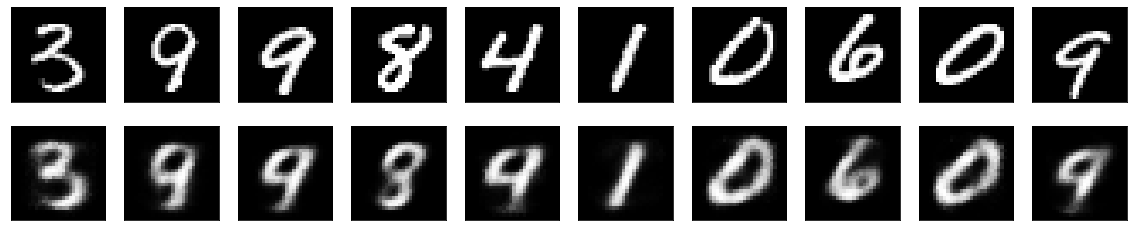

In [10]:
# Retrieve the encoder and decoder as separate networks
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

encoded_imgs = encoder.predict(x_test_ae)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_ae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Note that the autoencoder is not fully converged yet as it was trained on only 10 epochs. You may want to try and run it for longer to get better digit reconstruction.

## 3. DNN 

In this section, we will use a simple DNN with 2 layers to classify MNIST dataset and then we will compare its performance with CNN in the next section.

Before building DNN network, we need to load MNIST data and preprocess data

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

batch_size = 32
num_classes = 10
num_train = 6000 # Max is 60000
num_test = 1000 # Max is 5000
num_val = 1000 # Max is 5000
# Only keep a subset of the data
x_train_nn = x_train[:num_train,:,:,None]
y_train_nn = y_train[:num_train]
x_test_nn = x_test[:num_test,:,:,None]
y_test_nn = y_test[:num_test]
x_val_nn = x_test[:num_val,:,:,None]
y_val_nn = y_test[:num_val]

x_train_nn = x_train_nn.astype('float32')
x_test_nn = x_test_nn.astype('float32')
x_val_nn = x_val_nn.astype('float32')
x_train_nn /= 255.
x_test_nn /= 255.
x_val_nn /= 255.
# Convert class vectors to binary class matrices.
y_train_nn = keras.utils.to_categorical(y_train_nn, num_classes)
y_test_nn = keras.utils.to_categorical(y_test_nn, num_classes)
y_val_nn = keras.utils.to_categorical(y_val_nn, num_classes)

In [12]:
x_train_dnn = x_train_nn.reshape(6000,784)
x_test_dnn = x_test_nn.reshape(1000,784)
x_val_dnn = x_val_nn.reshape(1000,784)

**Build a simple 2 layer DNN**

In [13]:
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

model = Sequential()
model.add(Dense(units=256, activation='sigmoid', input_shape=x_train_dnn.shape[1:]))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 1s 170us/step - loss: 2.1628 - acc: 0.3675 - val_loss: 1.9883 - val_acc: 0.5970
Epoch 2/10
6000/6000 [==============================] - 1s 106us/step - loss: 1.8895 - acc: 0.6132 - val_loss: 1.7255 - val_acc: 0.6180
Epoch 3/10
6000/6000 [==============================] - 1s 106us/step - loss: 1.6568 - acc: 0.6917 - val_loss: 1.4869 - val_acc: 0.7220
Epoch 4/10
6000/6000 [==============================] - 1s 98us/step - loss: 1.4537 - acc: 0.7328 - val_loss: 1.2898 - val_acc: 0.7820
Epoch 5/10
6000/6000 [==============================] - 1s 113us/step - loss: 1.2831 - acc: 0.7640 - val_loss: 1.1253 - val_acc: 0.8110
Epoch 6/10
6000/6000 [==============================] - 1s 126us/step - loss: 1.1424 - acc: 0.7892 - val_loss: 0.9963 - val_acc: 0.8420
Epoch 7/10
6000/6000 [==============================] - 1s 115us/step - loss: 1.0309 - acc: 0.8062 - val_loss: 0.8885 - val_acc: 0.8670
E

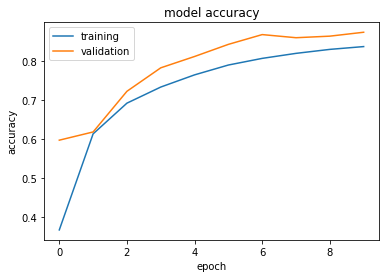

In [14]:
epochs = 10
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

history_dnn = model.fit(x_train_dnn, y_train_nn, batch_size=batch_size, epochs=epochs,
              validation_data=(x_val_dnn, y_val_nn), shuffle=True)

plt.plot(history_dnn.history['acc'])
plt.plot(history_dnn.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

## 4. CNN

#### Simple CNN

In [15]:
# Create CNN topology
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train_nn.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        36928     
__________

3
Train on 6000 samples, validate on 1000 samples
Epoch 1/3
6000/6000 [==============================] - 62s 10ms/step - loss: 0.5102 - acc: 0.8468 - val_loss: 0.2141 - val_acc: 0.9300
Epoch 2/3
6000/6000 [==============================] - 60s 10ms/step - loss: 0.1834 - acc: 0.9480 - val_loss: 0.1041 - val_acc: 0.9700
Epoch 3/3
6000/6000 [==============================] - 59s 10ms/step - loss: 0.1075 - acc: 0.9682 - val_loss: 0.0719 - val_acc: 0.9800


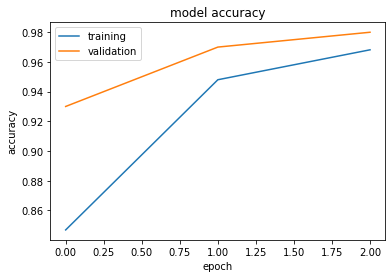

In [16]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit model to data
epochs = 3
print(epochs)
history_cnn1 = model.fit(x_train_nn, y_train_nn, batch_size=batch_size, epochs=epochs,
              validation_data=(x_val_nn, y_val_nn), shuffle=True)
plt.plot(history_cnn1.history['acc'])
plt.plot(history_cnn1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [17]:
score = model.evaluate(x_test_nn, y_test_nn, batch_size=32, verbose=1)
print("\nTest accuracy is {}%".format(100.0*score[1]))

1000/1000 [==============================] - 3s 3ms/step

Test accuracy is 98.0%


CNN gives a better results than DNN but it takes a significant long time to train the model.

## 5. Adding dropout and pooling to the CNN
Max pooling and dropouts are tricks that improve deep neural networks.

Max pooling (http://yann.lecun.com/exdb/publis/pdf/boureau-icml-10.pdf) speeds up CNN training and encourages CNN to learn translation-invariant features.
Dropout (https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) is a regularisation technique preventing the model from overfitting the data.

In [18]:
# Create CNN topology
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train_nn.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
print(model.summary())


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
__________________________

In [19]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit model to data
epochs = 3
history_cnn2 = model.fit(x_train_nn, y_train_nn, batch_size=batch_size, epochs=epochs,
              validation_data=(x_val_nn, y_val_nn), shuffle=True)

Train on 6000 samples, validate on 1000 samples
Epoch 1/3
6000/6000 [==============================] - 19s 3ms/step - loss: 1.4770 - acc: 0.5347 - val_loss: 0.4576 - val_acc: 0.8610
Epoch 2/3
6000/6000 [==============================] - 18s 3ms/step - loss: 0.5936 - acc: 0.8135 - val_loss: 0.2367 - val_acc: 0.9170
Epoch 3/3
6000/6000 [==============================] - 17s 3ms/step - loss: 0.3896 - acc: 0.8798 - val_loss: 0.1839 - val_acc: 0.9330


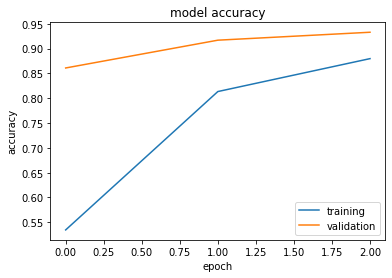

In [20]:
plt.plot(history_cnn2.history['acc'])
plt.plot(history_cnn2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Evaluate model score on test set.

In [21]:
score = model.evaluate(x_test_nn, y_test_nn, batch_size=32, verbose=1)
print("\nTest accuracy is {}%".format(100.0*score[1]))

1000/1000 [==============================] - 1s 1ms/step

Test accuracy is 93.30000000000001%
